<a href="https://colab.research.google.com/github/FelipePinheiro964/Steelsheets-weight-calculator/blob/main/steelsheets-weight-calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modo de uso

**Utilizar apenas arquivos `.csv UTF-8`!**

Para iniciar, use capture_250205_101115.png ou as teclas `ctrl` + `enter`.

***LEIA AS INSTRUÇÕES ANTES DE INICIAR!***

---


O programa a seguir analisa uma tabela padrão com as medidas e espessuras de cada chapa fornecida pelo usuário, retornando um novo DataFrame com a coluna `Peso KG [total]` adicionada.

A tabela baseia-se nos dados do link https://acrobat.adobe.com/id/urn:aaid:sc:US:ebddd7b3-a2dd-4664-9d77-f92247f997d2 para o cálculo. UTILIZE O ARQUIVO DE MEDIDAS EXATAS DE ESPESSURA DISPONÍVEL NO SITE!


Para iniciar a leitura do seu arquivo, clique em `ficheiros` 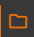 no canto superior esquerdo, arraste o seu arquivo para a aba aberta junto com os dados de espessura fornecidos (`steelsheets.csv`).

A aba deve ficar desta forma:

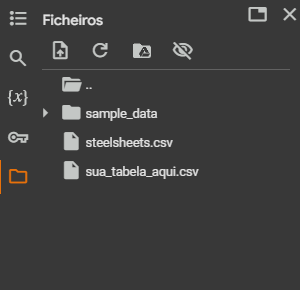

# Seleção de funções



> CASO 1


Utilizando o `caso 1`, podemos visualizar os dados da tabela `steelsheets`.



> CASO 2

No segundo caso, você deve fornecer o nome do arquivo que contém os dados de medidas e espessura das chapas (**O ARQUIVO DEVE ESTAR NA ABA FICHEIROS!**). Em seguida, serão retornadas duas tabelas:

* A tabela original fornecida pelo usuário para consulta.
* A tabela gerada pelo programa.

Na tabela fornecida pelo programa, estará disponível a coluna `Peso KG [total]`, que representa o peso total das peças listadas anteriormente.

* O resultado do peso é a soma de cada item; assim, se
você tiver 2 itens, o peso somado será o resultado.




```
peso = (x * y * multiplicador de espessura)  * quantidade
```



> CASO 3

Para utilizar a nova tabela fora do programa, use o terceiro caso para exportar o arquivo. Ao selecionar, digite o nome desejado para o arquivo, pressione a tecla `enter` e aguarde o arquivo na aba ficheiros 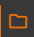. Após este processo, clique nos 3 pontos ao lado do novo arquivo na aba ficheiros, e selecione `"Transferir"`.

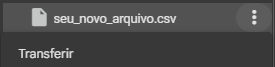


***IMPORTANTE!!***

Se você deseja baixar mais de um arquivo, faça isso individualmente, um por vez. O `caso 3` exportará **apenas o ultimo arquivo selecionado no** `caso 2`!!

> Finalizar programa


***CERTIFIQUE-SE DE TER FEITO TUDO O NECESSÁRIO NA SUA CONSULTA!***  
*Se não tiver finalizado sua consulta, será necessário reiniciar o programa e repetir os processos após a conclusão.*



Para finalizar o programa em qualquer momento, digite `"sair"`. O programa será encerrado e pode ser reiniciado utilizando capture_250205_101115.png ou as teclas `Ctrl` + `Enter`.







---



In [14]:
# @title

#Import de ferramentas
import pandas as pd

#Variavel Padrao
should_exit = False

f = "steelsheets.csv"
steelsheets = pd.read_csv(f, sep=",")



# Carregar os dados principais
print("O arquivo carregado deve ser obrigatoriamente .csv,\ncom colunas pre-definidas.")
print("Utilize apenas o modelo especificado!")


#################################
####### Menu de selecao #########
#################################
while True:
  print("")
  print("-------Opções de uso---------")
  print("Selecione o numero para opção desejada")
  print("Digite 'sair' para finalizar o programa")
  print("1 - Visualizar tabela de chapas")
  print("2 - Calcular peso de chapas")
  print("3 - Fazer download da nova tabela")
  print('')

  try:
    print("Selecione a opção desejada de acordo com a lista acima:")
    menu = input()
    menu = str.lower(menu)
    if menu == "sair" or menu == FileExistsError:
      should_exit = True
      break
  except:

    TypeError or ValueError
    continue

  match menu:

    case '1':
      pd.set_option('display.max.rows', None)
      print("Tabela de chapas: ")
      display(steelsheets)

    case '2':

      # Carregar os dados principais
      print("O arquivo carregado deve ser obrigatoriamente .csv,\ncom colunas padrão definidas.")
      print("Utilize apenas o modelo especificado!")

      try:
        arq = input("Escreva o nome do seu arquivo: ")
        if arq == "sair":
          print("Finalizando programa...")
          should_exit = True
          break
        else:
          print(arq + ".csv")
          df = pd.read_csv(arq + ".csv", sep=",")
          print("Sua tabela: ")
          display(df)
      except (ValueError, TypeError) as e:
        print("Utilize um arquivo válido ou modifique o nome.")
        should_exit = True

      if not should_exit:
        # Extraindo valores das colunas
        name = df["Nome"].values
        cod = df["Identificador"].values
        x = df["xM"].values
        y = df["yM"].values
        z = df["espessura (mm)"].values
        quant = df["quantidade"].values

        # Inicializar uma lista para armazenar os resultados
        result = []

        # Loop para iterar sobre os dados
        for i in range(len(df)):

          #Leitura de linhas
          for _, row in steelsheets.iterrows():
            espessura = row["ESPESSURAMM"]
            kg = row["PESOKGM2"]

            # Verificar se a espessura corresponde
            if espessura == z[i]:
                # Calcular peso
                peso = x[i] * y[i] * kg * quant[i]  # Cálculo do peso

                # Adicionar resultado à lista
                result.append({
                    "Peça": name[i],
                    "Codigo": cod[i],
                    "Espessura": espessura,
                    "Peso KG [total]": round(peso, 2),
                    "Dimensões": f"{x[i]} x {y[i]}",
                    "Quantidade": quant[i]
                })

      # Criar um DataFrame com os resultados
      result_df = pd.DataFrame(result)

      # Reorganizar as colunas para exibição
      result_df = result_df[["Peça", "Codigo", "Espessura", "Peso KG [total]", "Dimensões", "Quantidade"]]

      # Exibir a tabela com os resultados
      print("Resultados: ")
      display(result_df)

    case '3':
        name = input("Insira um nome para tabela: ")
        name = str.lower(name)
        if name == "sair":
          print("Finalizando programa...")
          should_exit = True
          break
        else:
          result_df.to_csv(name + ".csv", index=False, encoding='utf-8')


O arquivo carregado deve ser obrigatoriamente .csv,
com colunas pre-definidas.
Utilize apenas o modelo especificado!

-------Opções de uso---------
Selecione o numero para opção desejada
Digite 'sair' para finalizar o programa
1 - Visualizar tabela de chapas
2 - Calcular peso de chapas
3 - Fazer download da nova tabela

Selecione a opção desejada de acordo com a lista acima:
1
Tabela de chapas: 


,ESPESSURAMM,PESOKGM2
0,254.00,1991.9
1,203.20,1593.5
2,177.80,1394.3
3,165.10,1294.7
4,152.40,1195.1
5,139.70,1095.5
6,127.00,995.9
7,114.30,896.3
8,101.60,796.7
9,95.25,747.0



-------Opções de uso---------
Selecione o numero para opção desejada
Digite 'sair' para finalizar o programa
1 - Visualizar tabela de chapas
2 - Calcular peso de chapas
3 - Fazer download da nova tabela

Selecione a opção desejada de acordo com a lista acima:
2
O arquivo carregado deve ser obrigatoriamente .csv,
com colunas padrão definidas.
Utilize apenas o modelo especificado!
Escreva o nome do seu arquivo: sua_tabela_aqui
sua_tabela_aqui.csv
Sua tabela: 


,Nome,Identificador,quantidade,xM,yM,espessura (mm)
0,painel de operacao,ESP-0160.0014,1,1.9490,0.2000,1.21
1,Suporte p. de operacao,ESP-0177.0013,1,0.1000,0.0800,1.21
2,Painel apoio do operador,ESP.0224.0010,1,0.2000,2.0000,1.21
3,Refor‡o do mancal,PPR-0004.0027,4,0.1000,0.1000,4.76
4,Espa‡ador do cabe‡ote,PPR-0004.0028,4,0.0600,0.1200,4.76
5,Lateral do cabe‡ote,PPR-0004.0029,2,0.8400,0.1200,1.90
6,Apoio do pistÆo,PRR-0004.0030,1,0.0800,0.0950,9.53
7,PADRAO_SUBTETO1,PPR-0002.0008,1,0.8980,0.5850,1.21
8,PADRAO_SUBTETO2,PPR-0002.0009,1,0.8980,0.6150,1.21
9,PADRAO_SUBTETOCENTRAL,PPR-0002.0010,1,0.8980,0.2000,1.21


Resultados: 


,Peça,Codigo,Espessura,Peso KG [total],Dimensões,Quantidade
0,painel de operacao,ESP-0160.0014,1.21,3.82,1.949 x 0.2,1
1,Suporte p. de operacao,ESP-0177.0013,1.21,0.08,0.1 x 0.08,1
2,Painel apoio do operador,ESP.0224.0010,1.21,3.92,0.2 x 2.0,1
3,Refor‡o do mancal,PPR-0004.0027,4.76,1.49,0.1 x 0.1,4
4,Espa‡ador do cabe‡ote,PPR-0004.0028,4.76,1.07,0.06 x 0.12,4
5,Lateral do cabe‡ote,PPR-0004.0029,1.90,3.08,0.84 x 0.12,2
6,Apoio do pistÆo,PRR-0004.0030,9.53,0.57,0.08 x 0.095,1
7,PADRAO_SUBTETO1,PPR-0002.0008,1.21,5.15,0.898 x 0.585,1
8,PADRAO_SUBTETO2,PPR-0002.0009,1.21,5.41,0.898 x 0.615,1
9,PADRAO_SUBTETOCENTRAL,PPR-0002.0010,1.21,1.76,0.898 x 0.2,1



-------Opções de uso---------
Selecione o numero para opção desejada
Digite 'sair' para finalizar o programa
1 - Visualizar tabela de chapas
2 - Calcular peso de chapas
3 - Fazer download da nova tabela

Selecione a opção desejada de acordo com a lista acima:
3
Insira um nome para tabela: nova_tabela_aqui

-------Opções de uso---------
Selecione o numero para opção desejada
Digite 'sair' para finalizar o programa
1 - Visualizar tabela de chapas
2 - Calcular peso de chapas
3 - Fazer download da nova tabela

Selecione a opção desejada de acordo com a lista acima:
sair




---



# Possiveis erros

**IMPORTANTE!**

*Qualquer erro deve ser notificado ao programador para correção; não modifique o código sem antes consultar!*



---






> **TypeError or ValueError**


***Exemplos:***

```
TypeError: list indices must be integers or slices, not str
```




```
Traceback (most recent call last):
  File "/Users/ pankaj/Documents/PycharmProjects/hello-world/journaldev/errors/valueerror_examples.py", line 11, in <module>
    x = int(input('Please enter a positive number:\n'))
ValueError: invalid literal for int() with base 10: 'abc'
```

**Possiveis causas**

Esse tipo de erro geralmente ocorre devido a um erro de digitação ou à falta de um arquivo. Se isso acontecer, verifique se:


1.   O nome do arquivo é valido;
2.   Se um caractere especial foi usado inadequadamente;
3.   Se a tebela `steelsheets.csv` está presente na aba ficheiros.


**Solução**

Sempre opte por chamar o programador. Se não for possível, reinicie o programa, verifique os arquivos fornecidos e tente novamente. Se o erro persistir, evite testes sem a consulta prévia do programador.




> **KeyError**

**Exemplo:**


```
---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<ipython-input-13-8982a1a307f8> in <cell line: 0>()
    109
    110       # Reorganizar as colunas para exibição
--> 111       result_df = result_df[["Peça", "Codigo", "Espessura", "Peso KG [total]", "Dimensões", "Quantidade"]]
    112
    113       # Exibir a tabela com os resultados
```
**Possiveis causas**

KeyError pode ocorrer devido à falta de dados em uma das colunas fornecidas pelo usuário.




**Solução**

Verifique se:



1.   O arquivo possui dados faltando como: `None`, -, `Null`;
2.   Verifique se a tabela `steelsheets` foi alterada;
3.   Verifique se não possui letras em colunas numéricas;
4.   Verifique se não há caracteres especiais no arquivo;
5.   Verifique se o arquivo está no formato `.csv UTF-8`.


Depois disso, reinicie o programa e tente novamente. Se o erro persistir, consulte o programador.




> **FileNotFoundError**

***Exemplo:***



```
Traceback (most recent call last):
  File "/Users/ AshleyStallings/Documents/School Work/Computer Programming/Side Projects/How many? (Python).py", line 9, in <module>
    fileScan= open(fileName, 'r')  #Opens file
FileNotFoundError: [Errno 2] No such file or directory: 'test.rtf'
```

**Possiveis causas**

O erro de arquivo não encontrado ocorre pela falta de dados fornecidos pelo usuário. Verifique se:



1.   O arquivo `steelsheets` está na aba ficheiros;
2.   O arquivo fornecido pelo usuário está presente na aba ficheiros;
3.   O arquivo está em um formato válido (`.csv UTF-8`);
4.   Se o usuário forneceu o nome correto do arquivo;
5.   Se o arquivo está corretamente separado por vírgulas.


**Solução**

Verifique os arquivos fornecidos e atualize a aba de arquivos. Utilize o bloco de notas para visualizar seu arquivo e certifique-se de que os dados estão separados por vírgulas. Reinicie a página e tente novamente. Se o erro persistir, consulte o programador.

> **NameError**

**Exemplo:**



```
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<ipython-input-6-2b78fd2f84ef> in <cell line: 0>()
    121           break
    122         else:
--> 123           result_df.to_csv(nam + ".csv", index=False, encoding='utf-8')

NameError: name 'nam' is not defined
```


**Possiveis causas**

Para o NameError, a causa pode estar no codigo, anote a mensagem e notifique o programador.

**Solução**

Notifique o programador para corrigir o codigo. *NÃO SALVE O ARQUIVO!*



> **Codigo exibido na tela**

**Possiveis causas**

O código exibido na tela do usuário pode aparecer involuntariamente ou por engano ao selecionar `Mostrar código` ao lado do inicializador.


**Solução**

Se o código aparecer na tela, **NÃO MODIFIQUE O CÓDIGO**. Utilize a aba `Ver` no canto superior esquerdo, abaixo do título, e selecione `Mostrar/ocultar código`. Se a opção não estiver disponível, clique uma vez no código e tente novamente.





> **Para qualquer outro tipo de erro**

Se ocorrer um erro diferente dos listados, tente reiniciar a página. Se o problema persistir, consulte o programador. Verifique seus arquivos e use o programa apenas para o cálculo de peso com as tabelas fornecidas.





